### Skims (Wait Time) - Preprocessing, Step 2
**Author:** Carlos Guirado
**Date:** Feb 2023
**Objective:** Imports csv files consolidated by Solo/Pooled RH and time period and produces summaries and plots.

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import h5py
import boto.s3
import glob
import boto3
from zipfile import ZipFile
import shutil
import io

In [2]:
import pyreadr
import openmatrix as omx

Part 1: By time period, summary statistics

In [29]:
# Select time period
period = 'pm'

# options: 'am', 'pm', 'ev', 'md', 'ea'

In [30]:
combined_csv_pooled = pd.read_csv(f'all_waits_pooled_{period}.csv')

In [31]:
# range 3 to 45
s = pd.Series(range(3,45))

In [32]:
s2 = (s.repeat(8)).to_list()

In [33]:
combined_csv_pooled['run'] = s2

In [34]:
df_pooled = combined_csv_pooled.pivot(index='run', columns='Unnamed: 0', values='1')

In [35]:
df_pooled

Unnamed: 0,25%,50%,75%,count,max,mean,min,std
run,,,,,,,,
3,1.811420,2.355212,3.046721,1400.0,14.933333,2.620003,0.016667,1.344462
4,2.092276,2.600000,3.262733,1401.0,12.783334,2.851846,0.016667,1.265736
5,2.208314,2.742675,3.430801,1400.0,10.210417,2.943256,0.016667,1.222022
6,1.785431,2.256888,2.942042,1407.0,11.972222,2.496655,0.016667,1.157537
7,1.589652,2.055312,2.692280,1406.0,11.766666,2.307521,0.316667,1.231138
8,0.935249,1.312462,1.794091,1409.0,10.287009,1.574233,0.066667,1.099043
9,0.529148,0.717090,1.037322,1410.0,9.961267,1.007195,0.000000,1.028078
10,1.621022,2.095170,2.765986,1407.0,9.838097,2.362417,0.016667,1.180077
11,1.377838,1.825380,2.482167,1408.0,10.950000,2.100114,0.326190,1.214571


In [36]:
df_pooled_median = df_pooled.iloc[:,1]

In [37]:
df_pooled_median.to_csv('df_pooled_median_waits.csv')

In [38]:
combined_csv_solo = pd.read_csv(f'all_waits_solo_{period}.csv')

In [39]:
combined_csv_solo['run'] = s2

In [40]:
df_solo = combined_csv_solo.pivot(index='run', columns='Unnamed: 0', values='1')

In [41]:
df_solo

Unnamed: 0,25%,50%,75%,count,max,mean,min,std
run,,,,,,,,
3,2.500000,3.575000,4.783340,1263.0,14.083333,3.758388,0.0,1.945719
4,2.283333,3.397014,4.617778,1276.0,13.983334,3.579523,0.0,1.951766
5,2.033333,3.025000,4.331667,1262.0,13.683333,3.353900,0.0,1.974348
6,2.137292,2.998958,4.059028,1344.0,14.283334,3.261222,0.0,1.772646
7,2.105238,2.936932,3.867709,1346.0,12.366667,3.140928,0.0,1.634482
8,2.004762,2.748016,3.616671,1393.0,14.000000,2.950662,0.0,1.599527
9,1.837180,2.602778,3.390275,1401.0,14.900000,2.758044,0.0,1.436002
10,2.516668,3.472909,4.534950,1355.0,14.283334,3.615562,0.0,1.751481
11,2.424161,3.323959,4.258333,1372.0,14.133333,3.474232,0.0,1.685791


In [42]:
df_solo_median = df_solo.iloc[:,1]
df_solo_median.to_csv('df_solo_median_waits.csv')

Part 2: Charts

In [43]:
# See spreadsheet for levels included herein

In [ ]:
# Levers:
# 1. Number of fleets
# 2. RH Solo price
# 3. RH Pooled price
# 4. Total fleet size
# AUX: Type of test carried out

In [44]:
n_fleets = [1,
2,
5,
5,
5,
5,
5,
2,
2,
2,
2,
2,
5,
5,
5,
5,
5,
2,
5,
5,
5,
5,
5,
2,
5,
5,
5,
5,
5,
2,
5,
5,
5,
5,
5,
1,
2,
5,
5,
5,
5,
5]

In [45]:
size=['100%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%',
'164%',
'200%',
'400%',
'1000%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%',
'100%',
'100%',
'100%',
'164%',
'200%',
'400%',
'1000%']

In [46]:
price_solo=['100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'47%',
'47%',
'47%',
'47%',
'47%',
'47%',
'27%',
'27%',
'27%',
'27%',
'27%',
'27%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%']

In [47]:
price_pooled=[
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'100%',
'47%',
'47%',
'47%',
'47%',
'47%',
'47%',
'27%',
'27%',
'27%',
'27%',
'27%',
'27%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'12.5%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'6.25%',
'0%',
'0%',
'0%',
'0%',
'0%',
'0%',
'0%']

In [18]:
#test=['baseline','price','price','price','price','price','price','price','price','size','size','size','size','size','size','size']

In [49]:
df_solo['price_solo'] = price_solo
df_solo['price_pooled'] = price_pooled
df_solo['size'] = size
df_solo['n_fleets'] = n_fleets
#df_solo['test'] = test
df_pooled['price_solo'] = price_solo
df_pooled['price_pooled'] = price_pooled
df_pooled['size'] = size
df_pooled['n_fleets'] = n_fleets
#df_solo['test'] = test

In [50]:
df_solo['Type']='RH solo'
df_pooled['Type']='RH pooled'

In [51]:
df_solo

Unnamed: 0,25%,50%,75%,count,max,mean,min,std,price_solo,price_pooled,size,n_fleets,Type
run,,,,,,,,,,,,,
3,2.500000,3.575000,4.783340,1263.0,14.083333,3.758388,0.0,1.945719,100%,100%,100%,1,RH solo
4,2.283333,3.397014,4.617778,1276.0,13.983334,3.579523,0.0,1.951766,100%,100%,100%,2,RH solo
5,2.033333,3.025000,4.331667,1262.0,13.683333,3.353900,0.0,1.974348,100%,100%,100%,5,RH solo
6,2.137292,2.998958,4.059028,1344.0,14.283334,3.261222,0.0,1.772646,100%,100%,164%,5,RH solo
7,2.105238,2.936932,3.867709,1346.0,12.366667,3.140928,0.0,1.634482,100%,100%,200%,5,RH solo
8,2.004762,2.748016,3.616671,1393.0,14.000000,2.950662,0.0,1.599527,100%,100%,400%,5,RH solo
9,1.837180,2.602778,3.390275,1401.0,14.900000,2.758044,0.0,1.436002,100%,100%,1000%,5,RH solo
10,2.516668,3.472909,4.534950,1355.0,14.283334,3.615562,0.0,1.751481,100%,100%,164%,2,RH solo
11,2.424161,3.323959,4.258333,1372.0,14.133333,3.474232,0.0,1.685791,100%,100%,200%,2,RH solo


In [52]:
df_solo.apply(pd.to_numeric, errors='ignore').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 3 to 44
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   25%           42 non-null     float64
 1   50%           42 non-null     float64
 2   75%           42 non-null     float64
 3   count         42 non-null     float64
 4   max           42 non-null     float64
 5   mean          42 non-null     float64
 6   min           42 non-null     float64
 7   std           42 non-null     float64
 8   price_solo    42 non-null     object 
 9   price_pooled  42 non-null     object 
 10  size          42 non-null     object 
 11  n_fleets      42 non-null     int64  
 12  Type          42 non-null     object 
dtypes: float64(8), int64(1), object(4)
memory usage: 4.6+ KB


In [53]:
df_pooled.apply(pd.to_numeric, errors='ignore').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 3 to 44
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   25%           42 non-null     float64
 1   50%           42 non-null     float64
 2   75%           42 non-null     float64
 3   count         42 non-null     float64
 4   max           42 non-null     float64
 5   mean          42 non-null     float64
 6   min           42 non-null     float64
 7   std           42 non-null     float64
 8   price_solo    42 non-null     object 
 9   price_pooled  42 non-null     object 
 10  size          42 non-null     object 
 11  n_fleets      42 non-null     int64  
 12  Type          42 non-null     object 
dtypes: float64(8), int64(1), object(4)
memory usage: 4.6+ KB


In [54]:
df_pooled

Unnamed: 0,25%,50%,75%,count,max,mean,min,std,price_solo,price_pooled,size,n_fleets,Type
run,,,,,,,,,,,,,
3,1.811420,2.355212,3.046721,1400.0,14.933333,2.620003,0.016667,1.344462,100%,100%,100%,1,RH pooled
4,2.092276,2.600000,3.262733,1401.0,12.783334,2.851846,0.016667,1.265736,100%,100%,100%,2,RH pooled
5,2.208314,2.742675,3.430801,1400.0,10.210417,2.943256,0.016667,1.222022,100%,100%,100%,5,RH pooled
6,1.785431,2.256888,2.942042,1407.0,11.972222,2.496655,0.016667,1.157537,100%,100%,164%,5,RH pooled
7,1.589652,2.055312,2.692280,1406.0,11.766666,2.307521,0.316667,1.231138,100%,100%,200%,5,RH pooled
8,0.935249,1.312462,1.794091,1409.0,10.287009,1.574233,0.066667,1.099043,100%,100%,400%,5,RH pooled
9,0.529148,0.717090,1.037322,1410.0,9.961267,1.007195,0.000000,1.028078,100%,100%,1000%,5,RH pooled
10,1.621022,2.095170,2.765986,1407.0,9.838097,2.362417,0.016667,1.180077,100%,100%,164%,2,RH pooled
11,1.377838,1.825380,2.482167,1408.0,10.950000,2.100114,0.326190,1.214571,100%,100%,200%,2,RH pooled


In [55]:
df_pooled['price_solo'] = df_pooled['price_solo'].str.rstrip("%").astype(float)/100
df_pooled['price_pooled'] = df_pooled['price_pooled'].str.rstrip("%").astype(float)/100

In [56]:
df_pooled['size'] = df_pooled['size'].str.rstrip("%").astype(float)/100

In [57]:
df_solo['size'] = df_solo['size'].str.rstrip("%").astype(float)/100

In [58]:
df_solo['price_solo'] = df_solo['price_solo'].str.rstrip("%").astype(float)/100
df_solo['price_pooled'] = df_solo['price_pooled'].str.rstrip("%").astype(float)/100

In [130]:
# Calculate % change in median wait time wrt baseline with 1 fleet (row 3 in spreadsheet)

In [59]:
df_pooled['pc_diff']=((df_pooled['50%']-df_pooled['50%'].iloc[0])/df_pooled['50%'].iloc[0]*100)

In [60]:
df_solo['pc_diff']=((df_solo['50%']-df_solo['50%'].iloc[0])/df_solo['50%'].iloc[0]*100)

In [61]:
# preview
df_pooled

Unnamed: 0,25%,50%,75%,count,max,mean,min,std,price_solo,price_pooled,size,n_fleets,Type,pc_diff
run,,,,,,,,,,,,,,
3,1.811420,2.355212,3.046721,1400.0,14.933333,2.620003,0.016667,1.344462,1.0000,1.0000,1.00,1,RH pooled,0.000000
4,2.092276,2.600000,3.262733,1401.0,12.783334,2.851846,0.016667,1.265736,1.0000,1.0000,1.00,2,RH pooled,10.393468
5,2.208314,2.742675,3.430801,1400.0,10.210417,2.943256,0.016667,1.222022,1.0000,1.0000,1.00,5,RH pooled,16.451326
6,1.785431,2.256888,2.942042,1407.0,11.972222,2.496655,0.016667,1.157537,1.0000,1.0000,1.64,5,RH pooled,-4.174744
7,1.589652,2.055312,2.692280,1406.0,11.766666,2.307521,0.316667,1.231138,1.0000,1.0000,2.00,5,RH pooled,-12.733465
8,0.935249,1.312462,1.794091,1409.0,10.287009,1.574233,0.066667,1.099043,1.0000,1.0000,4.00,5,RH pooled,-44.274146
9,0.529148,0.717090,1.037322,1410.0,9.961267,1.007195,0.000000,1.028078,1.0000,1.0000,10.00,5,RH pooled,-69.553074
10,1.621022,2.095170,2.765986,1407.0,9.838097,2.362417,0.016667,1.180077,1.0000,1.0000,1.64,2,RH pooled,-11.041118
11,1.377838,1.825380,2.482167,1408.0,10.950000,2.100114,0.326190,1.214571,1.0000,1.0000,2.00,2,RH pooled,-22.496142


In [63]:
# Set styles

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

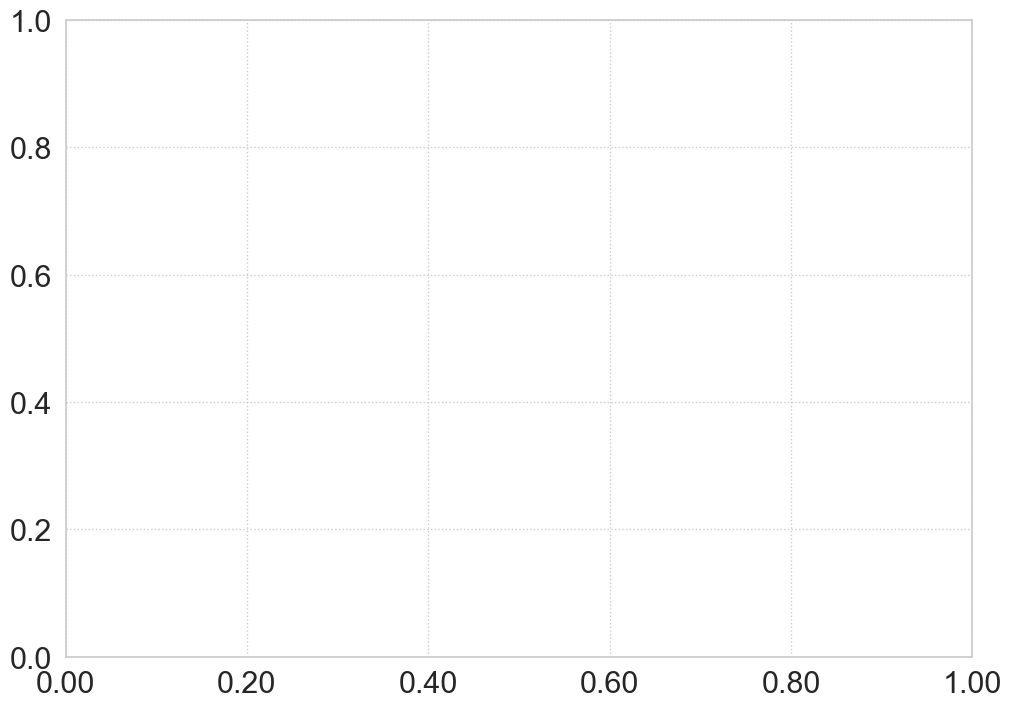

In [80]:
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid",{ "grid.linestyle": ":"})
plt.rc('legend', fontsize= 22)
plt.rc('xtick', labelsize= 22)    # fontsize of the tick labels
plt.rc('ytick', labelsize= 22)    # fontsize of the tick labels
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

In [81]:
markersize = 18
marker = '.'
color = 'b'
linewidth = 3.0
size = 22 # for labels

In [ ]:
# Unchanged since last version

In [86]:
# sns.set_style("whitegrid",{ "grid.linestyle": ":"})
# plt.rc('legend', fontsize= 22)
# plt.rc('xtick', labelsize= 22)    # fontsize of the tick labels
# plt.rc('ytick', labelsize= 22)    # fontsize of the tick labels
# #plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
# plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
# ax =sns.lineplot(
#     data=df_pooled.query("price_pooled == 1"),
#     x="size", 
#     y="pc_diff",
#     marker=marker,
#     markersize=markersize)
# plt.ylabel('Change in median waiting time in the AM period [%]', size=size)
# plt.xlabel('Fleet size multiplier', size=22)
# plt.title('Pooled ridehail', size=size)
# plt.savefig('rh_pool_size_waits.eps')

In [85]:
# sns.set_theme()
# ax =sns.lineplot(
#     data=df_pooled.query("size == 1"),
#     x="price", 
#     y="pc_diff")
# plt.ylabel('Change in median waiting time in the MD period [%]', size=12)
# plt.xlabel('Price multiplier', size=12)
# plt.title('Pooled ridehail', size=14)
# plt.savefig('rh_pool_price_waits.eps')

Joint - as line plots

In [84]:
# sns.set_style("whitegrid")
# ax =sns.lineplot(
#     data=df_solo.query("price == 1"),
#     x="size", 
#     y="pc_diff",
#     label="RH solo")
# ax1 =sns.lineplot(
#     data=df_pooled.query("price == 1"),
#     x="size", 
#     y="pc_diff",
#     label="RH pooled")
# plt.ylabel('Change in median waiting time in the AM period [%]', size=12)
# plt.xlabel('Fleet size multiplier', size=12)
# #plt.title('Solo ridehail', size=14)
# plt.savefig('rh_size_waits.eps')

In [83]:
# sns.set_style("whitegrid")
# ax =sns.lineplot(
#     data=df_solo.query("size == 1"),
#     x="price", 
#     y="pc_diff",
#     label="RH solo")
# ax1 =sns.lineplot(
#     data=df_pooled.query("size == 1"),
#     x="price", 
#     y="pc_diff",
#     label='RH pooled')
# plt.ylabel('Change in median waiting time in the AM period [%]', size=12)
# plt.xlabel('Price multiplier', size=12)
# #plt.title('Solo ridehail', size=14)
# plt.legend()
# plt.savefig('rh_price_waits.eps')

Joint - as bar plots

In [87]:
df_joint = pd.concat([df_solo, df_pooled])
#df_joint=df_joint.iloc[:,-5:]
df_joint

Unnamed: 0,25%,50%,75%,count,max,mean,min,std,price_solo,price_pooled,size,n_fleets,Type,pc_diff
run,,,,,,,,,,,,,,
3,2.500000,3.575000,4.783340,1263.0,14.083333,3.758388,0.000000,1.945719,1.0,1.0,1.00,1,RH solo,0.000000
4,2.283333,3.397014,4.617778,1276.0,13.983334,3.579523,0.000000,1.951766,1.0,1.0,1.00,2,RH solo,-4.978633
5,2.033333,3.025000,4.331667,1262.0,13.683333,3.353900,0.000000,1.974348,1.0,1.0,1.00,5,RH solo,-15.384614
6,2.137292,2.998958,4.059028,1344.0,14.283334,3.261222,0.000000,1.772646,1.0,1.0,1.64,5,RH solo,-16.113054
7,2.105238,2.936932,3.867709,1346.0,12.366667,3.140928,0.000000,1.634482,1.0,1.0,2.00,5,RH solo,-17.848061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,2.362499,3.016653,3.836667,1369.0,11.544445,3.250193,0.033333,1.380365,1.0,0.0,1.00,5,RH pooled,28.084145
41,2.141356,2.675594,3.327397,1388.0,14.066667,2.865655,0.016667,1.281462,1.0,0.0,1.64,5,RH pooled,13.603133
42,2.120439,2.624905,3.397937,1394.0,14.383333,2.877239,0.050000,1.268743,1.0,0.0,2.00,5,RH pooled,11.450923


In [88]:
df_joint['n_fleets'].value_counts()

5    60
2    20
1     4
Name: n_fleets, dtype: int64

In [123]:
# Choose parameters
n_fleets_1 = 2
n_fleets_2 = 5
price_rh_solo = 1
price_rh_pooled = 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


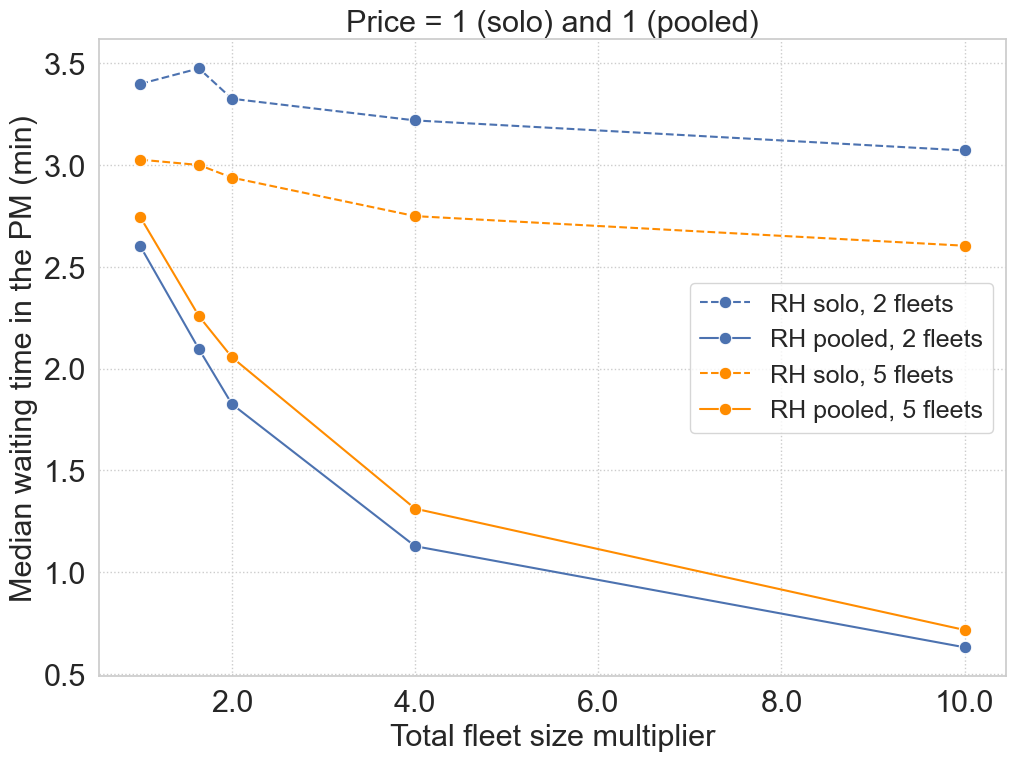

In [124]:
ax =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH solo') & 
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'b',
    linestyle='--',
    label=f"RH solo, {n_fleets_1} fleets")

ax1 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'b',
    label=f'RH pooled, {n_fleets_1} fleets')

ax2 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH solo') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle='--',
    label=f'RH solo, {n_fleets_2} fleets')

ax3 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_rh_solo) & (df_joint['price_pooled'] == price_rh_pooled)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    label=f'RH pooled, {n_fleets_2} fleets')

plt.ylabel('Median waiting time in the PM (min)', size=size)
plt.xlabel('Total fleet size multiplier', size=size)
plt.title(f'Price = {price_rh_solo} (solo) and {price_rh_pooled} (pooled)', size=22)
plt.legend(fontsize=18)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

In [125]:
df_joint['price_solo'].value_counts()

1.0000    36
0.4700    12
0.2700    12
0.1250    12
0.0625    12
Name: price_solo, dtype: int64

In [128]:
# Choose parameters
n_fleets_1 = 5
n_fleets_2 = 5
price_1 = 0.125
price_2 = 0.47

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


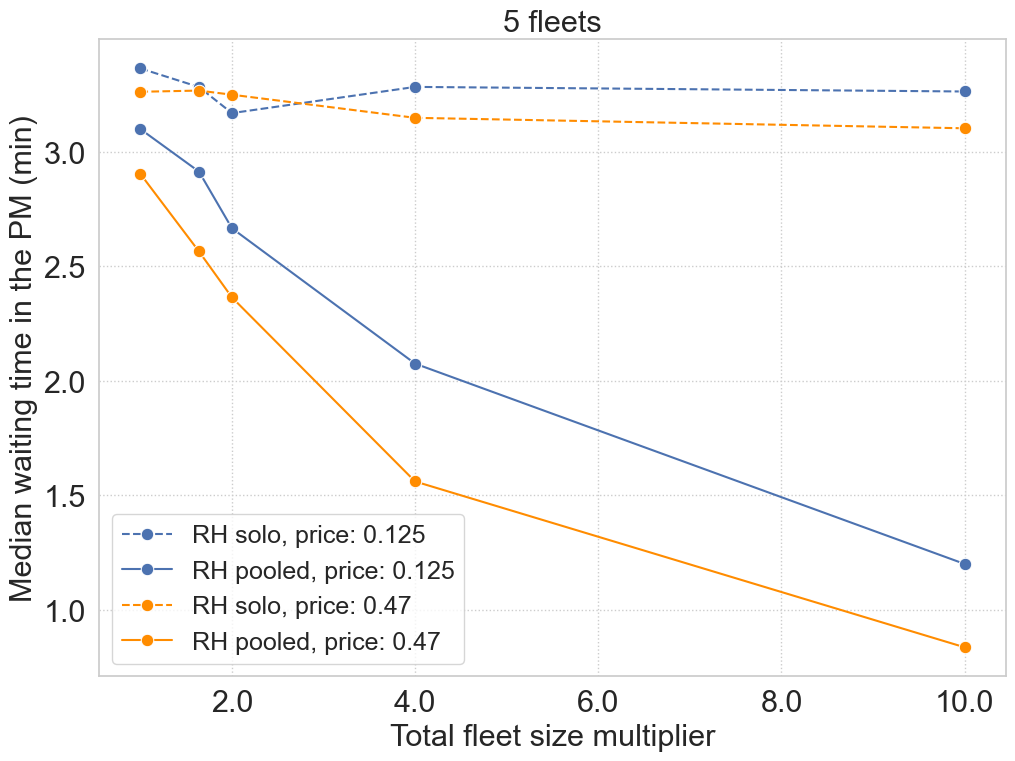

In [129]:
ax =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH solo') & 
                     (df_joint['price_solo'] == price_1) & (df_joint['price_pooled'] == price_1)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'b',
    linestyle='--',
    label=f"RH solo, price: {price_1}")

ax1 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_1) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_1) & (df_joint['price_pooled'] == price_1)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'b',
    label=f'RH pooled, price: {price_1}')

ax2 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH solo') &
                     (df_joint['price_solo'] == price_2) & (df_joint['price_pooled'] == price_2)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    linestyle='--',
    label=f'RH solo, price: {price_2}')

ax3 =sns.lineplot(
    data=df_joint.loc[(df_joint['n_fleets'] == n_fleets_2) & (df_joint['Type'] == 'RH pooled') &
                     (df_joint['price_solo'] == price_2) & (df_joint['price_pooled'] == price_2)],
    x="size", 
    y="50%",
    marker = marker,
    markersize = markersize,
    color = 'darkorange',
    label=f'RH pooled, price: {price_2}')

plt.ylabel('Median waiting time in the PM (min)', size=size)
plt.xlabel('Total fleet size multiplier', size=size)
plt.title(f'{n_fleets_1} fleets', size=22)
plt.legend(fontsize=18)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.savefig('rh_price_waits.eps')

In [ ]:
# Bar plots - have not touched since last version

In [38]:
# df_joint_const_price = df_joint[(df_joint['price']==1)]
# df_joint_const_size = df_joint[(df_joint['size']==1)]

In [39]:
# df_joint_const_price.drop(columns=['price','test'], axis=1, inplace=True)
# df_joint_const_size.drop(columns=['size','test'], axis=1, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_1220\2731022720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joint_const_price.drop(columns=['price','test'], axis=1, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_1220\2731022720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joint_const_size.drop(columns=['size','test'], axis=1, inplace=True)


In [40]:
# df_melted_const_price = pd.melt(df_joint_const_price, id_vars=['size', 'Type'], value_vars=['pc_diff'])
# df_melted_const_size = pd.melt(df_joint_const_size, id_vars=['price', 'Type'], value_vars=['pc_diff'])

In [41]:
# df_melted_const_price.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
# df_melted_const_size.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

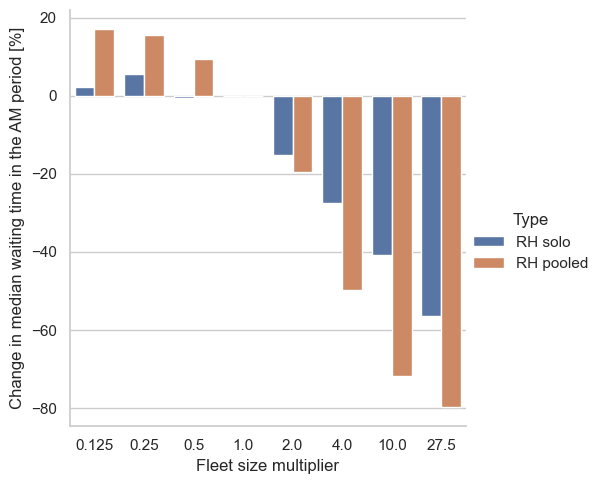

In [48]:
# sns.catplot(x='size', y='value', hue='Type', data=df_melted_const_price, kind='bar')
# plt.ylabel('Change in median waiting time in the AM period [%]', size=12)
# plt.xlabel('Fleet size multiplier', size=12)
# #plt.title('Solo ridehail', size=14)
# #plt.legend(title='RH mode', labels=['Solo', 'Pooled'])
# plt.savefig('waits/P_rh_size_waits_bar_PM.eps')

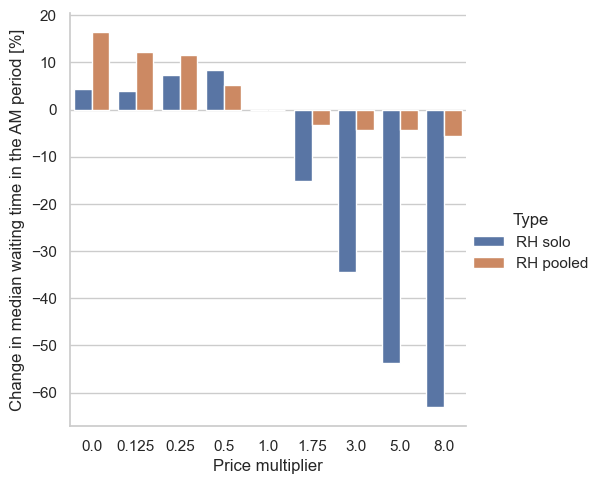

In [49]:
# sns.catplot(x='price', y='value', hue='Type', data=df_melted_const_size, kind='bar')
# plt.ylabel('Change in median waiting time in the AM period [%]', size=12)
# plt.xlabel('Price multiplier', size=12)
# #plt.title('Solo ridehail', size=14)
# #plt.legend(title='RH mode', labels=['Solo', 'Pooled'])
# plt.savefig('waits/P_rh_price_waits_bar_PM.eps')

In [44]:
#df_solo.to_csv('solo_rh_waits_AM.csv')

In [45]:
#df_pooled.to_csv('pooled_rh_waits_AM.csv')

In [131]:
df_joint.to_csv(f'joint_waits_{period}.csv')